# Milestone 2 - Second Model II

In [1]:
# imports 
import os 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import torch
from torchsummary import summary
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm.notebook import tqdm
from second_scripts import *
from scripts import *

### I. Data Prepration

In [2]:
# Read the data
# data_path = './data'
data_path = './DLCV_SS25_Dataset'  
images, labels = data_reader2(data_path)


In [3]:
num_classes = len(os.listdir(data_path))
num_classes

5

In [4]:
len(images)

2351

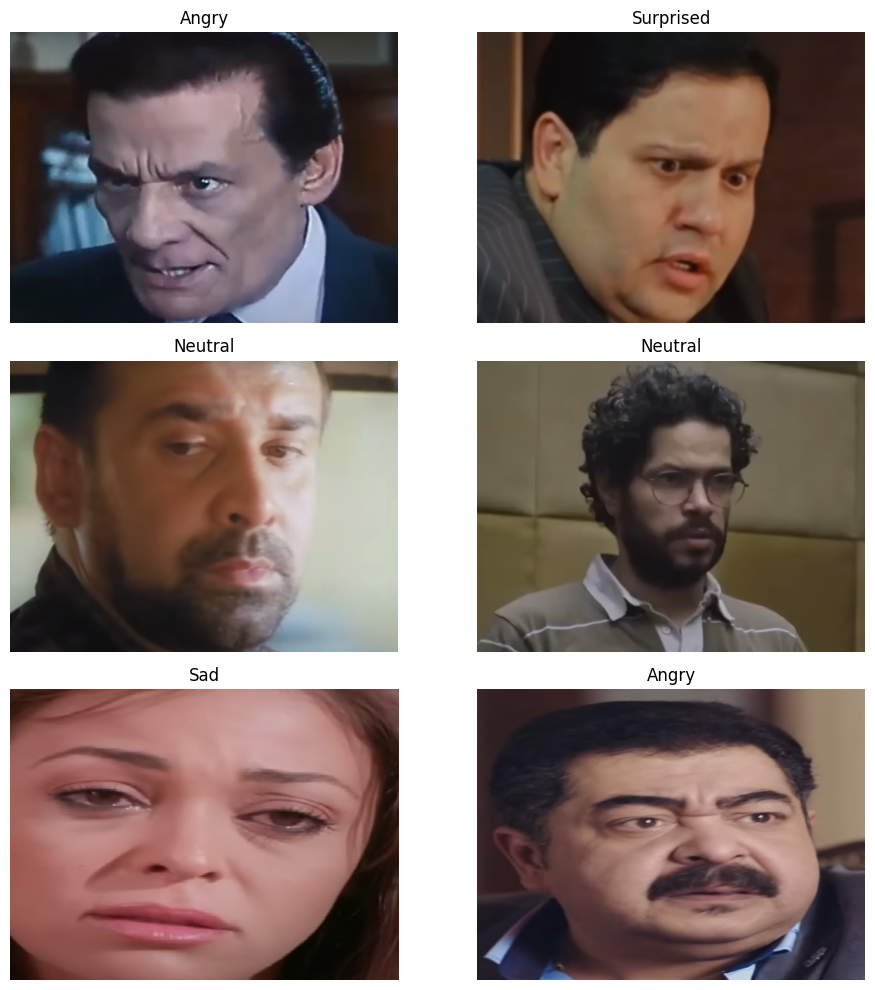

In [5]:
# View 4 random images and their titles
fig, axes = plt.subplots(3, 2, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    idx = np.random.randint(0, len(images))
    ax.imshow(images[idx])
    ax.set_title(labels[idx])
    ax.axis('off')
plt.tight_layout()
plt.show()

In [6]:
# Preprocess the images 
train_tuple, val_tuple, test_tuple, label_to_index = data_preperator2((images, labels))
index_to_label = {v: k for k, v in label_to_index.items()}

train_data, train_labels = train_tuple
val_data, val_labels = val_tuple
test_data, test_labels = test_tuple

train_data.shape, train_labels.shape, val_data.shape, val_labels.shape, test_data.shape, test_labels.shape

((1645, 512, 512, 3),
 (1645,),
 (470, 512, 512, 3),
 (470,),
 (236, 512, 512, 3),
 (236,))

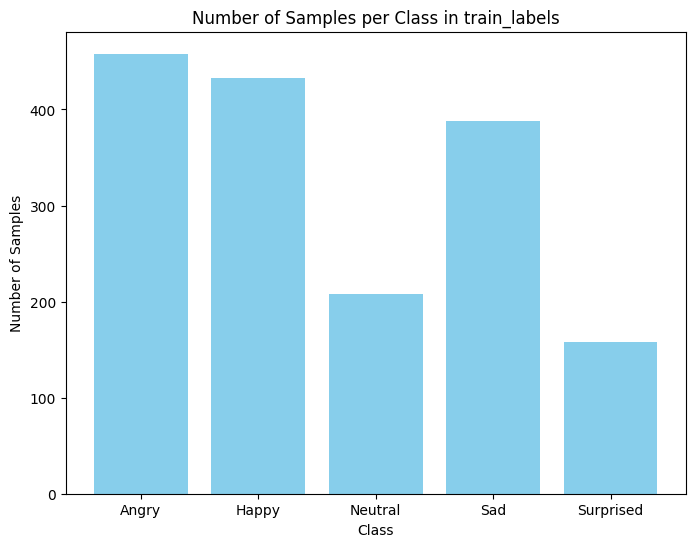

In [7]:
draw_barchart_labels(train_labels, label_to_index)

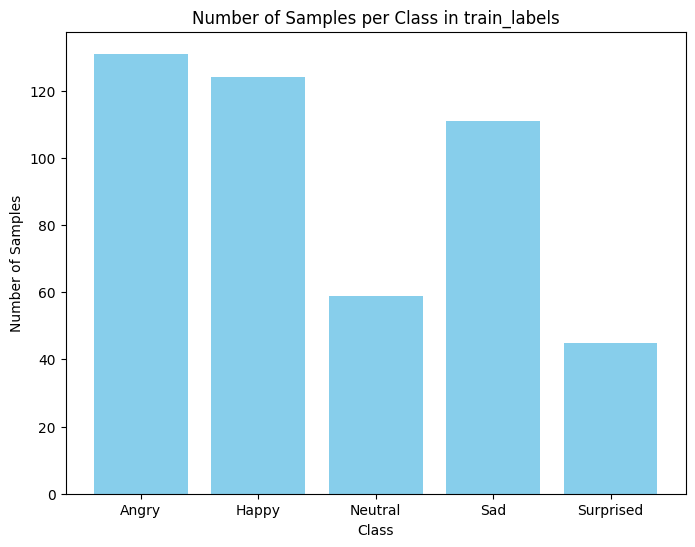

In [8]:
draw_barchart_labels(val_labels, label_to_index)

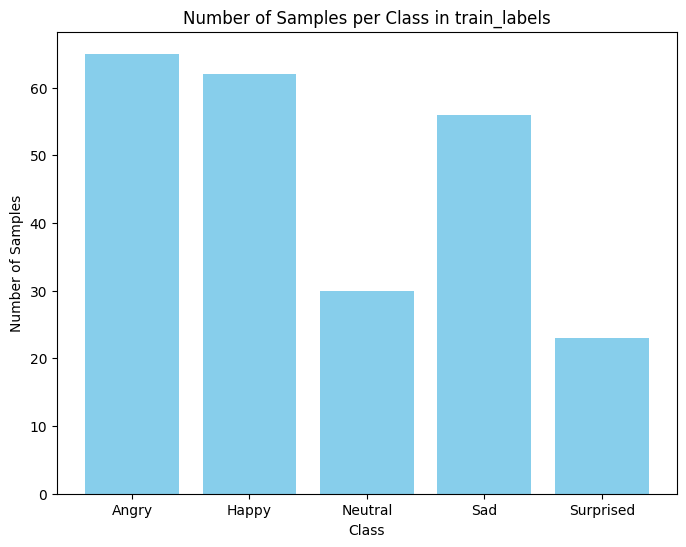

In [9]:
draw_barchart_labels(test_labels, label_to_index)

### II. Second Model

In [7]:
train_loader = convert_to_dataloader(data=(train_data, train_labels), batch_size=16, shuffle=True)
val_loader = convert_to_dataloader(data=(val_data, val_labels), batch_size=16, shuffle=False)
test_loader = convert_to_dataloader(data=(test_data, test_labels), batch_size=16, shuffle=False)

In [11]:
# Test second_model is working
second_model = SecondModel2()

example_image = torch.tensor(train_data[0], dtype=torch.float32).permute(2, 0, 1).unsqueeze(0)

output = second_model(example_image)

print("Output shape:", output.shape)
print("Output:", output)



Output shape: torch.Size([1, 5])
Output: tensor([[-0.1002,  0.0207, -0.2978, -0.1149, -0.5867]],
       grad_fn=<AddmmBackward0>)


In [12]:
summary(second_model, input_size=(3, 512, 512), batch_size=1, device="cpu")

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [1, 32, 510, 510]             896
              ReLU-2          [1, 32, 510, 510]               0
            Conv2d-3          [1, 64, 508, 508]          18,496
              ReLU-4          [1, 64, 508, 508]               0
            Conv2d-5          [1, 64, 506, 506]          36,928
              ReLU-6          [1, 64, 506, 506]               0
            Conv2d-7          [1, 32, 502, 502]          51,232
              ReLU-8          [1, 32, 502, 502]               0
            Conv2d-9          [1, 16, 496, 496]          25,104
             ReLU-10          [1, 16, 496, 496]               0
        MaxPool2d-11          [1, 16, 248, 248]               0
      BatchNorm2d-12          [1, 16, 248, 248]              32
         CNNBlock-13          [1, 16, 248, 248]               0
           Conv2d-14          [1, 32, 2

In [13]:
model = SecondModel2()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
num_epochs = 20

train_losses, val_losses, train_accuracies, val_accuracies = training(model, train_loader, val_loader, criterion, optimizer, num_epochs)

Epoch [1/20]
train_loss: 0.0986, train_acc: 0.2760


val_Loss: 1.5383  val_Acc: 0.2766  val_Prec: 0.1639  val_Rec: 0.2111  val_F1: 0.1784  val_ROC-AUC: 0.5426
--------------------------------------------------


Epoch [2/20]
train_loss: 0.0940, train_acc: 0.3301


val_Loss: 1.5082  val_Acc: 0.3255  val_Prec: 0.1981  val_Rec: 0.2443  val_F1: 0.2079  val_ROC-AUC: 0.5878
--------------------------------------------------


Epoch [3/20]
train_loss: 0.0920, train_acc: 0.3489


val_Loss: 1.5032  val_Acc: 0.3170  val_Prec: 0.3825  val_Rec: 0.2400  val_F1: 0.2027  val_ROC-AUC: 0.5931
--------------------------------------------------


Epoch [4/20]
train_loss: 0.0915, train_acc: 0.3550


val_Loss: 1.5026  val_Acc: 0.3213  val_Prec: 0.1867  val_Rec: 0.2421  val_F1: 0.1959  val_ROC-AUC: 0.6003
--------------------------------------------------


Epoch [5/20]
train_loss: 0.0904, train_acc: 0.3787


val_Loss: 1.5158  val_Acc: 0.2872  val_Prec: 0.1903  val_Rec: 0.2178  val_F1: 0.1817  val_ROC-AUC: 0.5921
--------------------------------------------------


Epoch [6/20]
train_loss: 0.0887, train_acc: 0.3982


val_Loss: 1.4698  val_Acc: 0.3574  val_Prec: 0.2136  val_Rec: 0.2684  val_F1: 0.2292  val_ROC-AUC: 0.6325
--------------------------------------------------


Epoch [7/20]
train_loss: 0.0860, train_acc: 0.4261


val_Loss: 1.5014  val_Acc: 0.3128  val_Prec: 0.2635  val_Rec: 0.2567  val_F1: 0.2344  val_ROC-AUC: 0.6432
--------------------------------------------------


Epoch [8/20]
train_loss: 0.0820, train_acc: 0.4669


val_Loss: 1.4816  val_Acc: 0.3553  val_Prec: 0.3174  val_Rec: 0.2742  val_F1: 0.2425  val_ROC-AUC: 0.6417
--------------------------------------------------


Epoch [9/20]
train_loss: 0.0778, train_acc: 0.5033


val_Loss: 1.4844  val_Acc: 0.3532  val_Prec: 0.3558  val_Rec: 0.2772  val_F1: 0.2523  val_ROC-AUC: 0.6384
--------------------------------------------------


Epoch [10/20]
train_loss: 0.0740, train_acc: 0.5508


val_Loss: 1.4940  val_Acc: 0.3574  val_Prec: 0.3007  val_Rec: 0.2826  val_F1: 0.2648  val_ROC-AUC: 0.6297
--------------------------------------------------


Epoch [11/20]
train_loss: 0.0693, train_acc: 0.5860


val_Loss: 1.4811  val_Acc: 0.3532  val_Prec: 0.3046  val_Rec: 0.2866  val_F1: 0.2715  val_ROC-AUC: 0.6484
--------------------------------------------------


Epoch [12/20]
train_loss: 0.0644, train_acc: 0.6401


val_Loss: 1.5471  val_Acc: 0.3745  val_Prec: 0.3510  val_Rec: 0.2985  val_F1: 0.2760  val_ROC-AUC: 0.6337
--------------------------------------------------


Epoch [13/20]
train_loss: 0.0595, train_acc: 0.6875


val_Loss: 1.5167  val_Acc: 0.3830  val_Prec: 0.2916  val_Rec: 0.3007  val_F1: 0.2768  val_ROC-AUC: 0.6463
--------------------------------------------------


Epoch [14/20]
train_loss: 0.0537, train_acc: 0.7283


val_Loss: 1.5767  val_Acc: 0.3532  val_Prec: 0.2520  val_Rec: 0.2744  val_F1: 0.2539  val_ROC-AUC: 0.6228
--------------------------------------------------


Epoch [15/20]
train_loss: 0.0484, train_acc: 0.7733


val_Loss: 1.6211  val_Acc: 0.3447  val_Prec: 0.3015  val_Rec: 0.2914  val_F1: 0.2886  val_ROC-AUC: 0.6172
--------------------------------------------------


Epoch [16/20]
train_loss: 0.0434, train_acc: 0.8170


val_Loss: 1.6024  val_Acc: 0.3787  val_Prec: 0.3259  val_Rec: 0.3165  val_F1: 0.3120  val_ROC-AUC: 0.6360
--------------------------------------------------


Epoch [17/20]
train_loss: 0.0380, train_acc: 0.8498


val_Loss: 1.6674  val_Acc: 0.3489  val_Prec: 0.2853  val_Rec: 0.2843  val_F1: 0.2764  val_ROC-AUC: 0.6259
--------------------------------------------------


Epoch [18/20]
train_loss: 0.0341, train_acc: 0.8657


val_Loss: 1.6979  val_Acc: 0.3340  val_Prec: 0.2718  val_Rec: 0.2748  val_F1: 0.2687  val_ROC-AUC: 0.6232
--------------------------------------------------


Epoch [19/20]
train_loss: 0.0309, train_acc: 0.8821


val_Loss: 1.7344  val_Acc: 0.3298  val_Prec: 0.2732  val_Rec: 0.2735  val_F1: 0.2694  val_ROC-AUC: 0.6194
--------------------------------------------------


Epoch [20/20]
train_loss: 0.0266, train_acc: 0.9119


val_Loss: 1.7218  val_Acc: 0.3745  val_Prec: 0.3343  val_Rec: 0.3258  val_F1: 0.3246  val_ROC-AUC: 0.6363
--------------------------------------------------


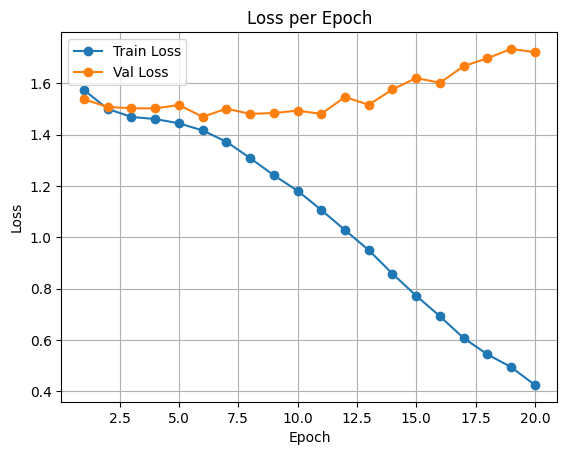

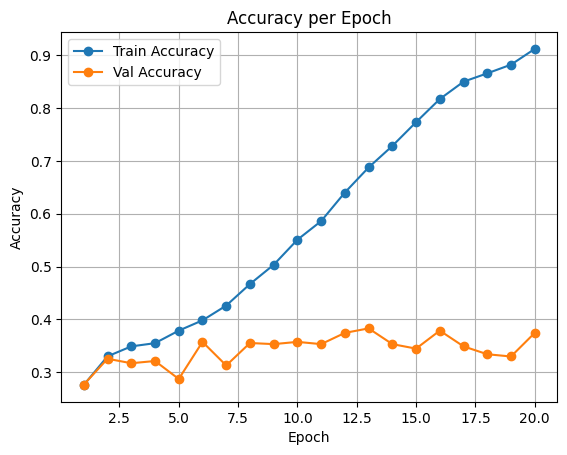

In [14]:
plot_loss_acc(train_losses, val_losses, train_accuracies, val_accuracies)

In [15]:
criterion = torch.nn.CrossEntropyLoss()
test_metrics = evaluate(model, test_loader, criterion, prefix='test_')

test_Loss: 1.7594  test_Acc: 0.3432  test_Prec: 0.2891  test_Rec: 0.2935  test_F1: 0.2903  test_ROC-AUC: 0.6340


In [16]:
model_path = "./models/second_model2.pkl"

In [17]:
save_model(model, model_path)

In [13]:
model = load_model(model_path)

In [18]:
images, trues, preds = predict(model, test_loader)

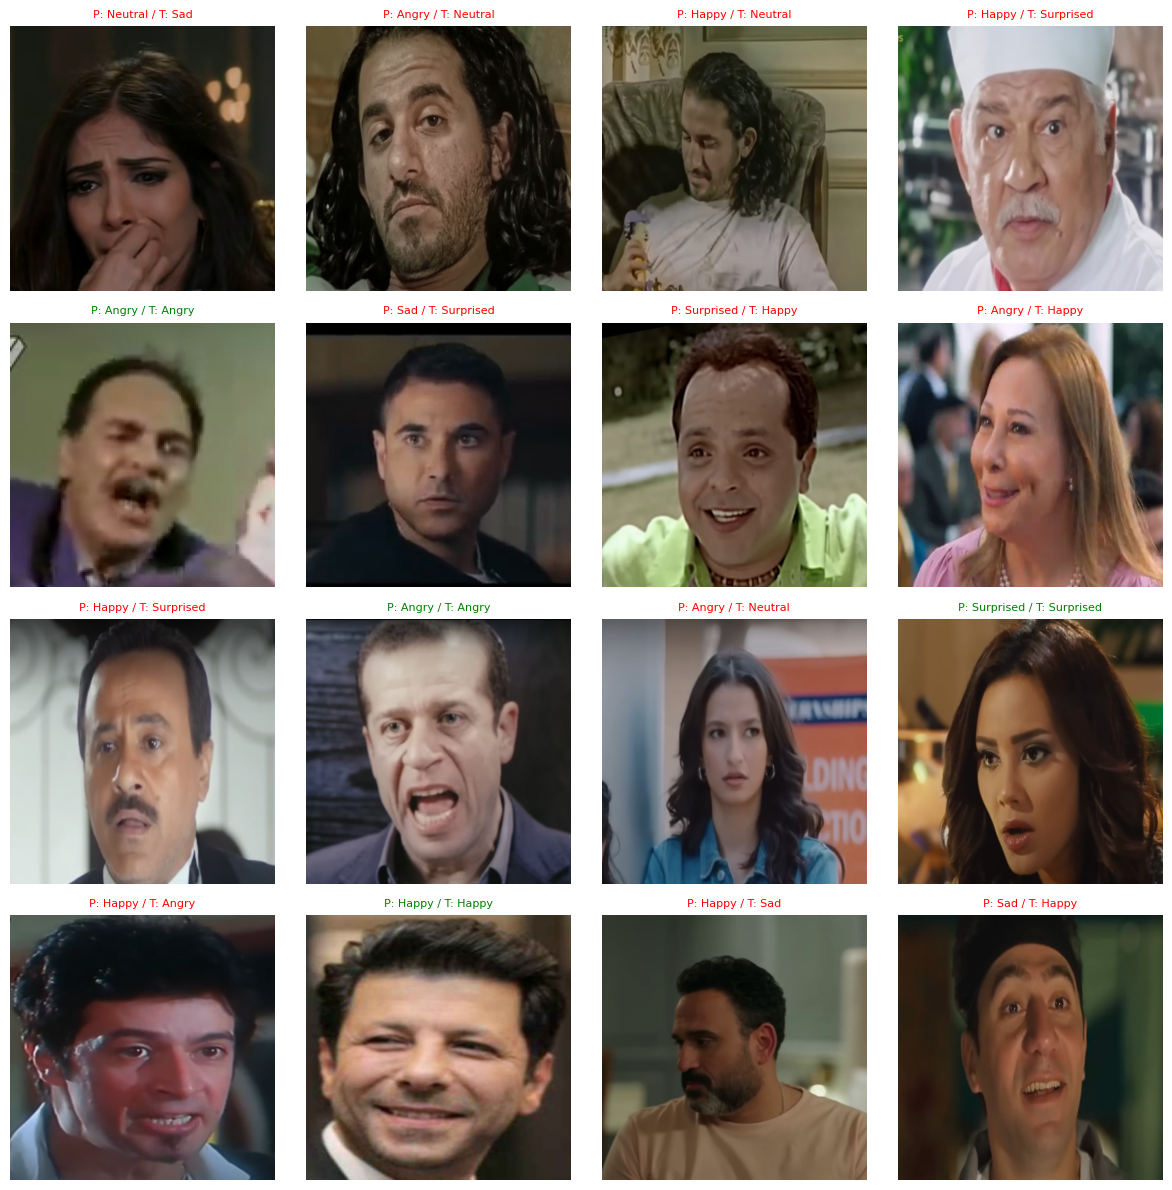

In [19]:
plot_predictions(images, trues, preds, index_to_label, num_images=16, nrow=4)

#### Using augmentation

In [20]:
# train_loader_augmented = convert_to_dataloader(data=(train_data, train_labels), batch_size=32, use_aug=True)

# index_to_label = {v: k for k, v in label_to_index.items()}
# i = 0
# for im, label in train_loader_augmented:
#     print(im.shape, label.shape)
#     # Display the first image and its label
#     plt.imshow(im[0].permute(1, 2, 0).numpy())
#     plt.title(index_to_label[label[0].item()])
#     plt.axis('off')
#     plt.show()
#     if i==10:
#         break
#     i+=1

In [11]:
train_loader_augmented = convert_to_dataloader_optimized(data=(train_data, train_labels), batch_size=16, use_aug=True)

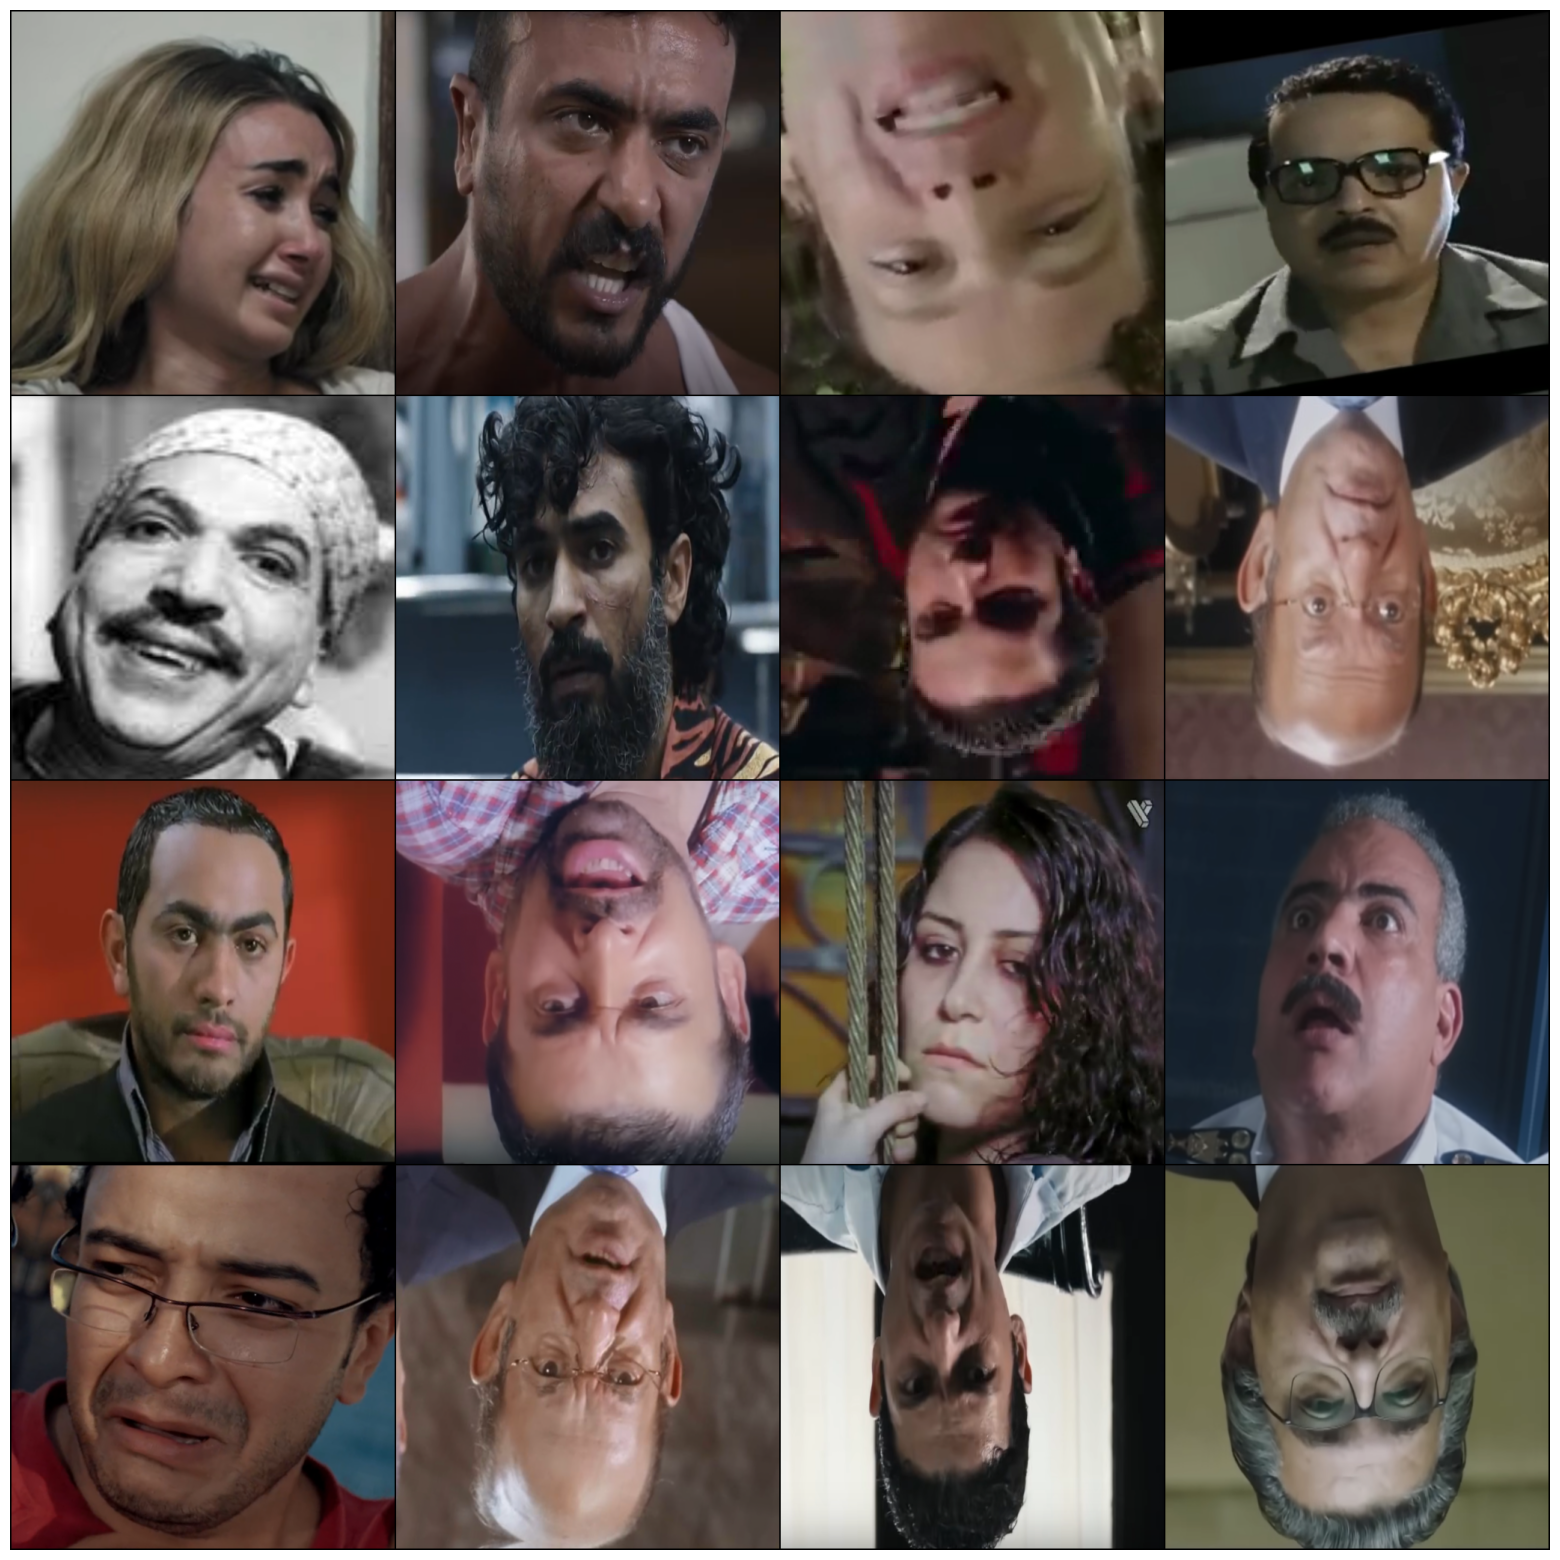

In [23]:
from torchvision.utils import make_grid

images, labels = next(iter(train_loader_augmented))  # shape: [16, 3, 512, 512]

grid = make_grid(images[:16], nrow=4, padding=2)     # → [3, Hg, Wg]

grid_np = grid.permute(1, 2, 0).cpu().numpy()        # → (Hg, Wg, 3)
plt.figure(figsize=(20,20))
plt.imshow(grid_np)
plt.axis('off')
plt.show()


In [12]:
model = SecondModel2()
criterion = torch.nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
num_epochs = 20

train_losses, val_losses, train_accuracies, val_accuracies = training(model, train_loader_augmented, val_loader, criterion, optimizer, num_epochs)

Epoch [1/20]
train_loss: 0.0997, train_acc: 0.2802


val_Loss: 1.5503  val_Acc: 0.2596  val_Prec: 0.1517  val_Rec: 0.1944  val_F1: 0.1615  val_ROC-AUC: 0.4909
--------------------------------------------------


Epoch [2/20]
train_loss: 0.0961, train_acc: 0.2845


val_Loss: 1.5533  val_Acc: 0.2872  val_Prec: 0.1327  val_Rec: 0.2134  val_F1: 0.1517  val_ROC-AUC: 0.4959
--------------------------------------------------


Epoch [3/20]
train_loss: 0.0954, train_acc: 0.3131


val_Loss: 1.5260  val_Acc: 0.2809  val_Prec: 0.1664  val_Rec: 0.2124  val_F1: 0.1825  val_ROC-AUC: 0.5409
--------------------------------------------------


Epoch [4/20]
train_loss: 0.0951, train_acc: 0.3179


val_Loss: 1.5243  val_Acc: 0.2979  val_Prec: 0.1842  val_Rec: 0.2303  val_F1: 0.1985  val_ROC-AUC: 0.5405
--------------------------------------------------


Epoch [5/20]
train_loss: 0.0947, train_acc: 0.3076


val_Loss: 1.5112  val_Acc: 0.3106  val_Prec: 0.1902  val_Rec: 0.2331  val_F1: 0.1980  val_ROC-AUC: 0.5763
--------------------------------------------------


Epoch [6/20]
train_loss: 0.0944, train_acc: 0.3106


val_Loss: 1.5068  val_Acc: 0.3106  val_Prec: 0.1847  val_Rec: 0.2307  val_F1: 0.1886  val_ROC-AUC: 0.5813
--------------------------------------------------


Epoch [7/20]
train_loss: 0.0938, train_acc: 0.3283


val_Loss: 1.5122  val_Acc: 0.3234  val_Prec: 0.1931  val_Rec: 0.2481  val_F1: 0.2168  val_ROC-AUC: 0.5709
--------------------------------------------------


Epoch [8/20]
train_loss: 0.0944, train_acc: 0.3173


val_Loss: 1.5022  val_Acc: 0.3255  val_Prec: 0.1951  val_Rec: 0.2501  val_F1: 0.2152  val_ROC-AUC: 0.5820
--------------------------------------------------


Epoch [9/20]
train_loss: 0.0940, train_acc: 0.3173


val_Loss: 1.5052  val_Acc: 0.3298  val_Prec: 0.2010  val_Rec: 0.2559  val_F1: 0.2228  val_ROC-AUC: 0.5656
--------------------------------------------------


Epoch [10/20]
train_loss: 0.0936, train_acc: 0.3319


val_Loss: 1.5098  val_Acc: 0.3234  val_Prec: 0.1968  val_Rec: 0.2483  val_F1: 0.2158  val_ROC-AUC: 0.5617
--------------------------------------------------


Epoch [11/20]
train_loss: 0.0936, train_acc: 0.3368


val_Loss: 1.5137  val_Acc: 0.3000  val_Prec: 0.1910  val_Rec: 0.2393  val_F1: 0.1922  val_ROC-AUC: 0.5968
--------------------------------------------------


Epoch [12/20]
train_loss: 0.0931, train_acc: 0.3410


val_Loss: 1.5024  val_Acc: 0.3213  val_Prec: 0.1598  val_Rec: 0.2353  val_F1: 0.1686  val_ROC-AUC: 0.5771
--------------------------------------------------


Epoch [13/20]
train_loss: 0.0937, train_acc: 0.3252


val_Loss: 1.5094  val_Acc: 0.2936  val_Prec: 0.1751  val_Rec: 0.2299  val_F1: 0.1955  val_ROC-AUC: 0.5736
--------------------------------------------------


Epoch [14/20]
train_loss: 0.0937, train_acc: 0.3173


val_Loss: 1.5167  val_Acc: 0.3064  val_Prec: 0.1923  val_Rec: 0.2394  val_F1: 0.2070  val_ROC-AUC: 0.5674
--------------------------------------------------


Epoch [15/20]
train_loss: 0.0934, train_acc: 0.3277


val_Loss: 1.5222  val_Acc: 0.3000  val_Prec: 0.1784  val_Rec: 0.2308  val_F1: 0.1876  val_ROC-AUC: 0.5633
--------------------------------------------------


Epoch [16/20]
train_loss: 0.0939, train_acc: 0.3295


val_Loss: 1.5070  val_Acc: 0.3106  val_Prec: 0.1825  val_Rec: 0.2397  val_F1: 0.2031  val_ROC-AUC: 0.5655
--------------------------------------------------


Epoch [17/20]
train_loss: 0.0930, train_acc: 0.3429


val_Loss: 1.5017  val_Acc: 0.3191  val_Prec: 0.1912  val_Rec: 0.2454  val_F1: 0.2093  val_ROC-AUC: 0.5825
--------------------------------------------------


Epoch [18/20]
train_loss: 0.0929, train_acc: 0.3295


val_Loss: 1.5123  val_Acc: 0.2915  val_Prec: 0.1392  val_Rec: 0.2169  val_F1: 0.1624  val_ROC-AUC: 0.5676
--------------------------------------------------


Epoch [19/20]
train_loss: 0.0935, train_acc: 0.3325


val_Loss: 1.4990  val_Acc: 0.3319  val_Prec: 0.1944  val_Rec: 0.2543  val_F1: 0.2182  val_ROC-AUC: 0.5772
--------------------------------------------------


Epoch [20/20]
train_loss: 0.0930, train_acc: 0.3441


val_Loss: 1.5037  val_Acc: 0.2979  val_Prec: 0.1876  val_Rec: 0.2334  val_F1: 0.2010  val_ROC-AUC: 0.5756
--------------------------------------------------


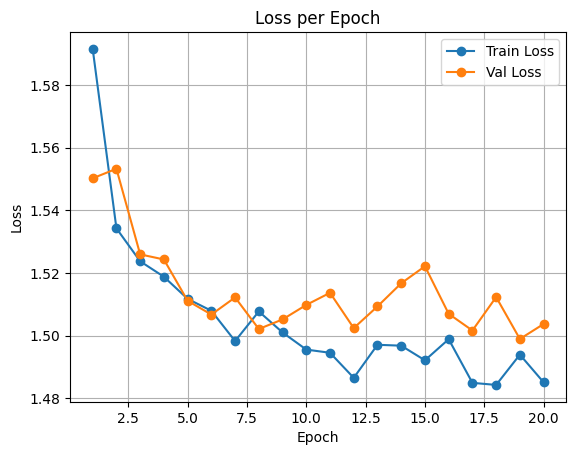

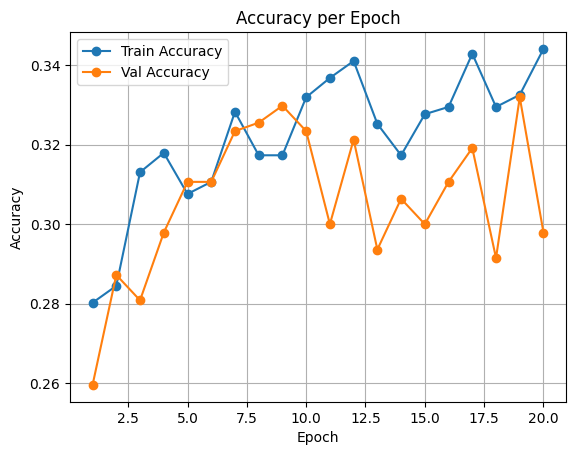

In [13]:
plot_loss_acc(train_losses, val_losses, train_accuracies, val_accuracies)

In [10]:
test_metrics = evaluate(model, test_loader, criterion, prefix='test_')

test_Loss: 1.4887  test_Acc: 0.3305  test_Prec: 0.2051  test_Rec: 0.2589  test_F1: 0.2237  test_ROC-AUC: 0.6121


In [8]:
model_path = "./models/second_model2_aug.pkl"

In [16]:
save_model(model, model_path)

In [9]:
model = load_model(model_path)

In [11]:
images, trues, preds = predict(model, test_loader)

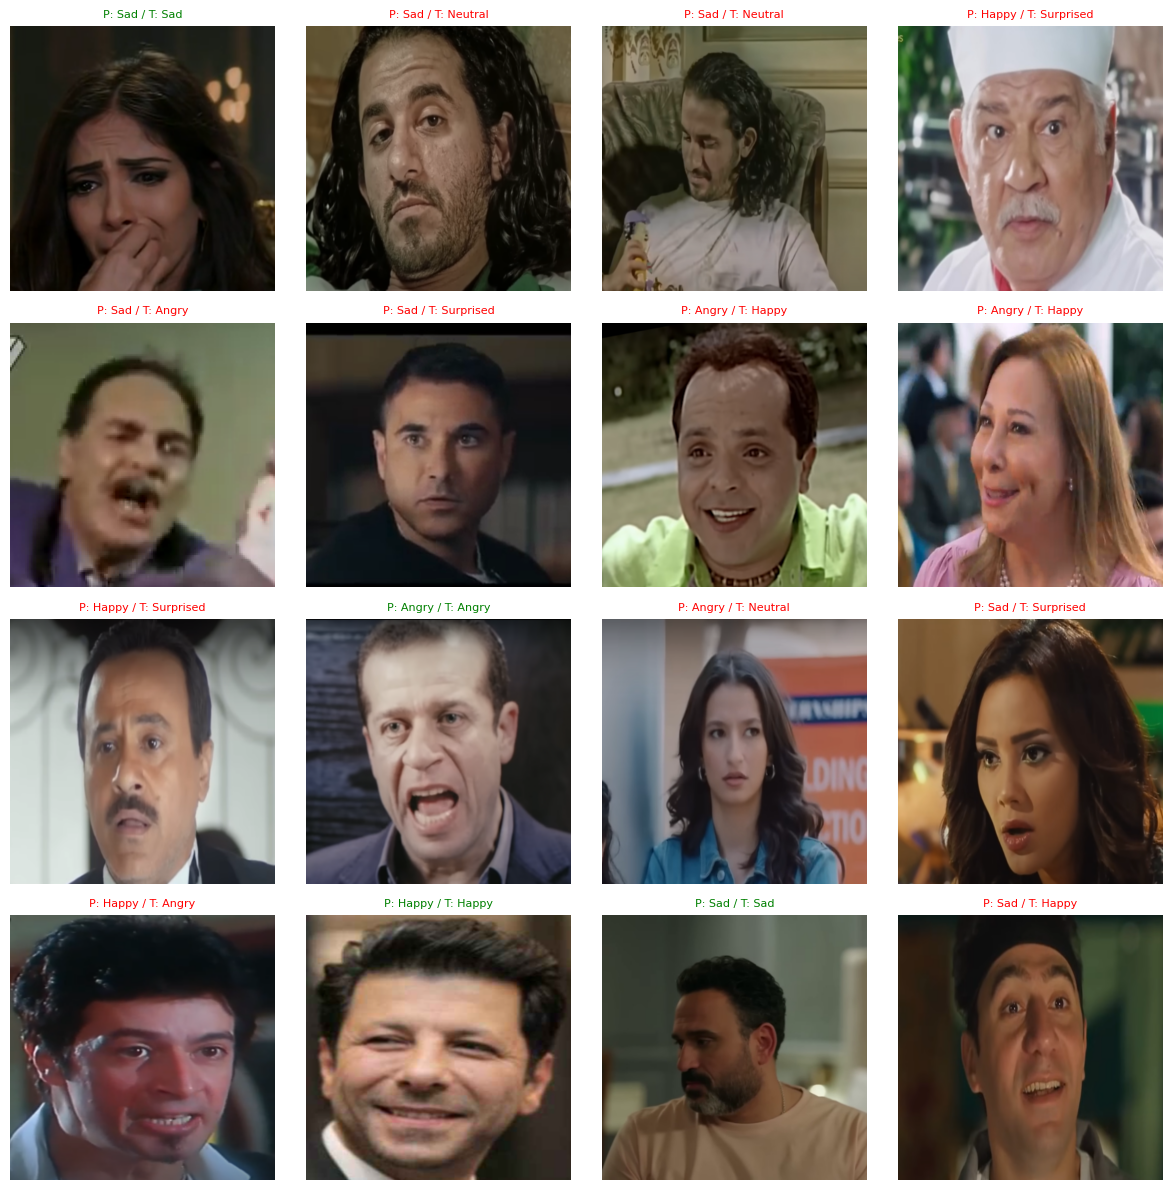

In [12]:
plot_predictions(images, trues, preds, index_to_label, num_images=16, nrow=4)